# loan status prediction


# problem statement
 it is a classification problem  where you determine the loan status of a person either fully paid or charged off

# loading the libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


# loading the dataset

In [31]:
d_train=pd.read_csv("credit_train.csv")
d_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


# checking for number of rows and columns

In [32]:
d_train.shape

(100514, 19)

# checking the column names

In [33]:
d_train.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

# checking for duplicates

In [34]:
d_train.duplicated().sum()

10728

# getting the summary of the data

In [35]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

# getting statistical data

In [36]:
d_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


# checking for null values

In [37]:
d_train.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

# data cleaning

# removing the duplicates

In [38]:
#dropping the duplicates
d_train.drop_duplicates(inplace=True)

In [39]:
#checking if the dulicates have been dropped
d_train.duplicated().sum()

0

In [40]:
#after removing the duplicates lets check the null values
d_train.isnull().sum()

Loan ID                             1
Customer ID                         1
Loan Status                         1
Current Loan Amount                 1
Term                                1
Credit Score                    19155
Annual Income                   19155
Years in current job             3803
Home Ownership                      1
Purpose                             1
Monthly Debt                        1
Years of Credit History             1
Months since last delinquent    48338
Number of Open Accounts             1
Number of Credit Problems           1
Current Credit Balance              1
Maximum Open Credit                 3
Bankruptcies                      191
Tax Liens                          10
dtype: int64

# dropping unnecesary  columns

In [41]:
#dropping unnecessary columns
d_train=d_train.drop(["Loan ID","Customer ID","Months since last delinquent"],axis=1)

In [42]:
#checking whether the columns  have been dropped
d_train.isna().sum()

Loan Status                      1
Current Loan Amount              1
Term                             1
Credit Score                 19155
Annual Income                19155
Years in current job          3803
Home Ownership                   1
Purpose                          1
Monthly Debt                     1
Years of Credit History          1
Number of Open Accounts          1
Number of Credit Problems        1
Current Credit Balance           1
Maximum Open Credit              3
Bankruptcies                   191
Tax Liens                       10
dtype: int64

# handling the null values

In [43]:
#filling null values with the mean for columns with higher null values
#filling the credit score
mean_value=d_train["Credit Score"].mean()
d_train["Credit Score"].fillna(mean_value,inplace=True)


In [44]:
#filling the annual income
a=d_train["Annual Income"].mean()
d_train["Annual Income"].fillna(a,inplace=True)



In [45]:
d_train.isna().sum()

Loan Status                     1
Current Loan Amount             1
Term                            1
Credit Score                    0
Annual Income                   0
Years in current job         3803
Home Ownership                  1
Purpose                         1
Monthly Debt                    1
Years of Credit History         1
Number of Open Accounts         1
Number of Credit Problems       1
Current Credit Balance          1
Maximum Open Credit             3
Bankruptcies                  191
Tax Liens                      10
dtype: int64

In [46]:
#dropping the  null values for columns with less values
d_train.dropna(inplace=True)



In [47]:
#check whether some columns has been dropped
d_train.isna().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

# visualization

In [48]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

<function matplotlib.pyplot.show(close=None, block=None)>

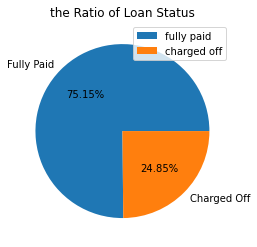

In [49]:
plt.pie(x = d_train['Loan Status'].value_counts() ,autopct='%1.2f%%' ,labels=d_train['Loan Status'].value_counts().index)
plt.title('the Ratio of Loan Status')
plt.legend(["fully paid", "charged off"])
plt.show

Text(0.5, 1.0, 'term distribution')

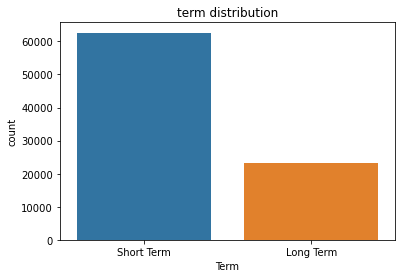

In [50]:
#term distribution
sns.countplot(d_train["Term"])
plt.title("term distribution")


Text(0.5, 1.0, 'distribution of home ownership')

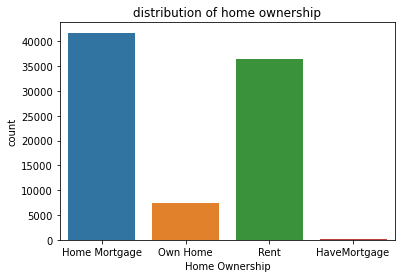

In [51]:
#home ownership distribution
sns.countplot(d_train["Home Ownership"])
plt.title("distribution of home ownership")

<function matplotlib.pyplot.show(close=None, block=None)>

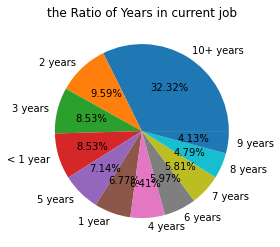

In [52]:
#distribution of years in cuurrent job
plt.pie(x = d_train['Years in current job'].value_counts() ,autopct='%1.2f%%' ,labels=d_train['Years in current job'].value_counts().index)
plt.title('the Ratio of Years in current job')
plt.show

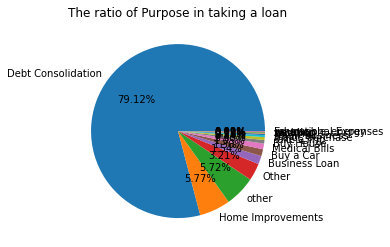

In [53]:
plt.pie(x=d_train["Purpose"].value_counts(),autopct='%1.2f%%',labels=d_train["Purpose"].value_counts().index)
plt.title('The ratio of Purpose in taking a loan')
plt.show()

Text(0.5, 1.0, 'credit score distribution')

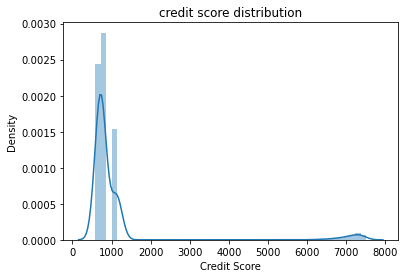

In [54]:
sns.distplot(d_train["Credit Score"])
plt.title("credit score distribution")

Text(0.5, 1.0, 'years of credit history distribution')

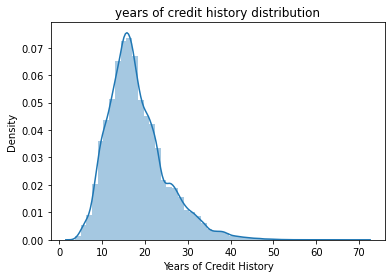

In [55]:
sns.distplot(d_train["Years of Credit History"])
plt.title("years of credit history distribution")

Text(0.5, 1.0, 'years of credit history distribution')

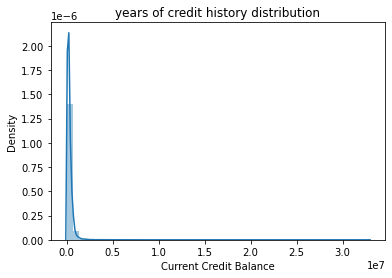

In [56]:
sns.distplot(d_train["Current Credit Balance"])
plt.title("years of credit history distribution")

# data preprocessing

In [57]:
#encoding the categorical columns
encode=LabelEncoder()
d_train["Loan Status"]=encode.fit_transform(d_train["Loan Status"])
d_train["Home Ownership"]=encode.fit_transform(d_train["Home Ownership"])
d_train["Term"]=encode.fit_transform(d_train["Term"])

In [58]:
d_train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.000000,1.167493e+06,8 years,1,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,1130.830598,1.375894e+06,10+ years,1,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.000000,2.231892e+06,8 years,2,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.000000,8.069490e+05,3 years,2,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,1130.830598,1.375894e+06,5 years,3,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [59]:
#encoding the purpose column in a different method since it has mant categories
d_train["Purpose"].value_counts()

Debt Consolidation      67877
Home Improvements        4946
other                    4903
Other                    2752
Business Loan            1322
Buy a Car                1111
Medical Bills             903
Buy House                 561
Take a Trip               462
major_purchase            312
small_business            244
moving                    125
wedding                   101
vacation                   83
Educational Expenses       81
renewable_energy            8
Name: Purpose, dtype: int64

In [60]:
#encoding the purpose column
dummy=pd.get_dummies(d_train["Purpose"],prefix="Purpose")
#concatenating the dummy column created with the original data d_train
d_train=pd.concat([d_train,dummy],axis=1)
#removing the original purpose column from d_train
d_train.drop(["Purpose"],axis=1,inplace=True)


In [70]:
#encoding the years column
dumy=pd.get_dummies(d_train["Years in current job"],prefix="Years in current job")
#concatenating the dummy column created with the original data d_train
d_train=pd.concat([d_train,dumy],axis=1)
#removing the original purpose column from d_train
d_train.drop(["Years in current job"],axis=1,inplace=True)

In [71]:
d_train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,...,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,1,445412.0,1,709.000000,1.167493e+06,1,5214.74,17.2,6.0,1.0,...,0,0,0,0,0,0,0,1,0,0
1,1,262328.0,1,1130.830598,1.375894e+06,1,33295.98,21.1,35.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,1,99999999.0,1,741.000000,2.231892e+06,2,29200.53,14.9,18.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3,1,347666.0,0,721.000000,8.069490e+05,2,8741.90,12.0,9.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,1,176220.0,1,1130.830598,1.375894e+06,3,20639.70,6.1,15.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [73]:
d_train.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Home Ownership', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Purpose_Business Loan', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_Take a Trip', 'Purpose_major_purchase', 'Purpose_moving',
       'Purpose_other', 'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding', 'Years in current job_1 year',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current j

# correlation

<AxesSubplot:>

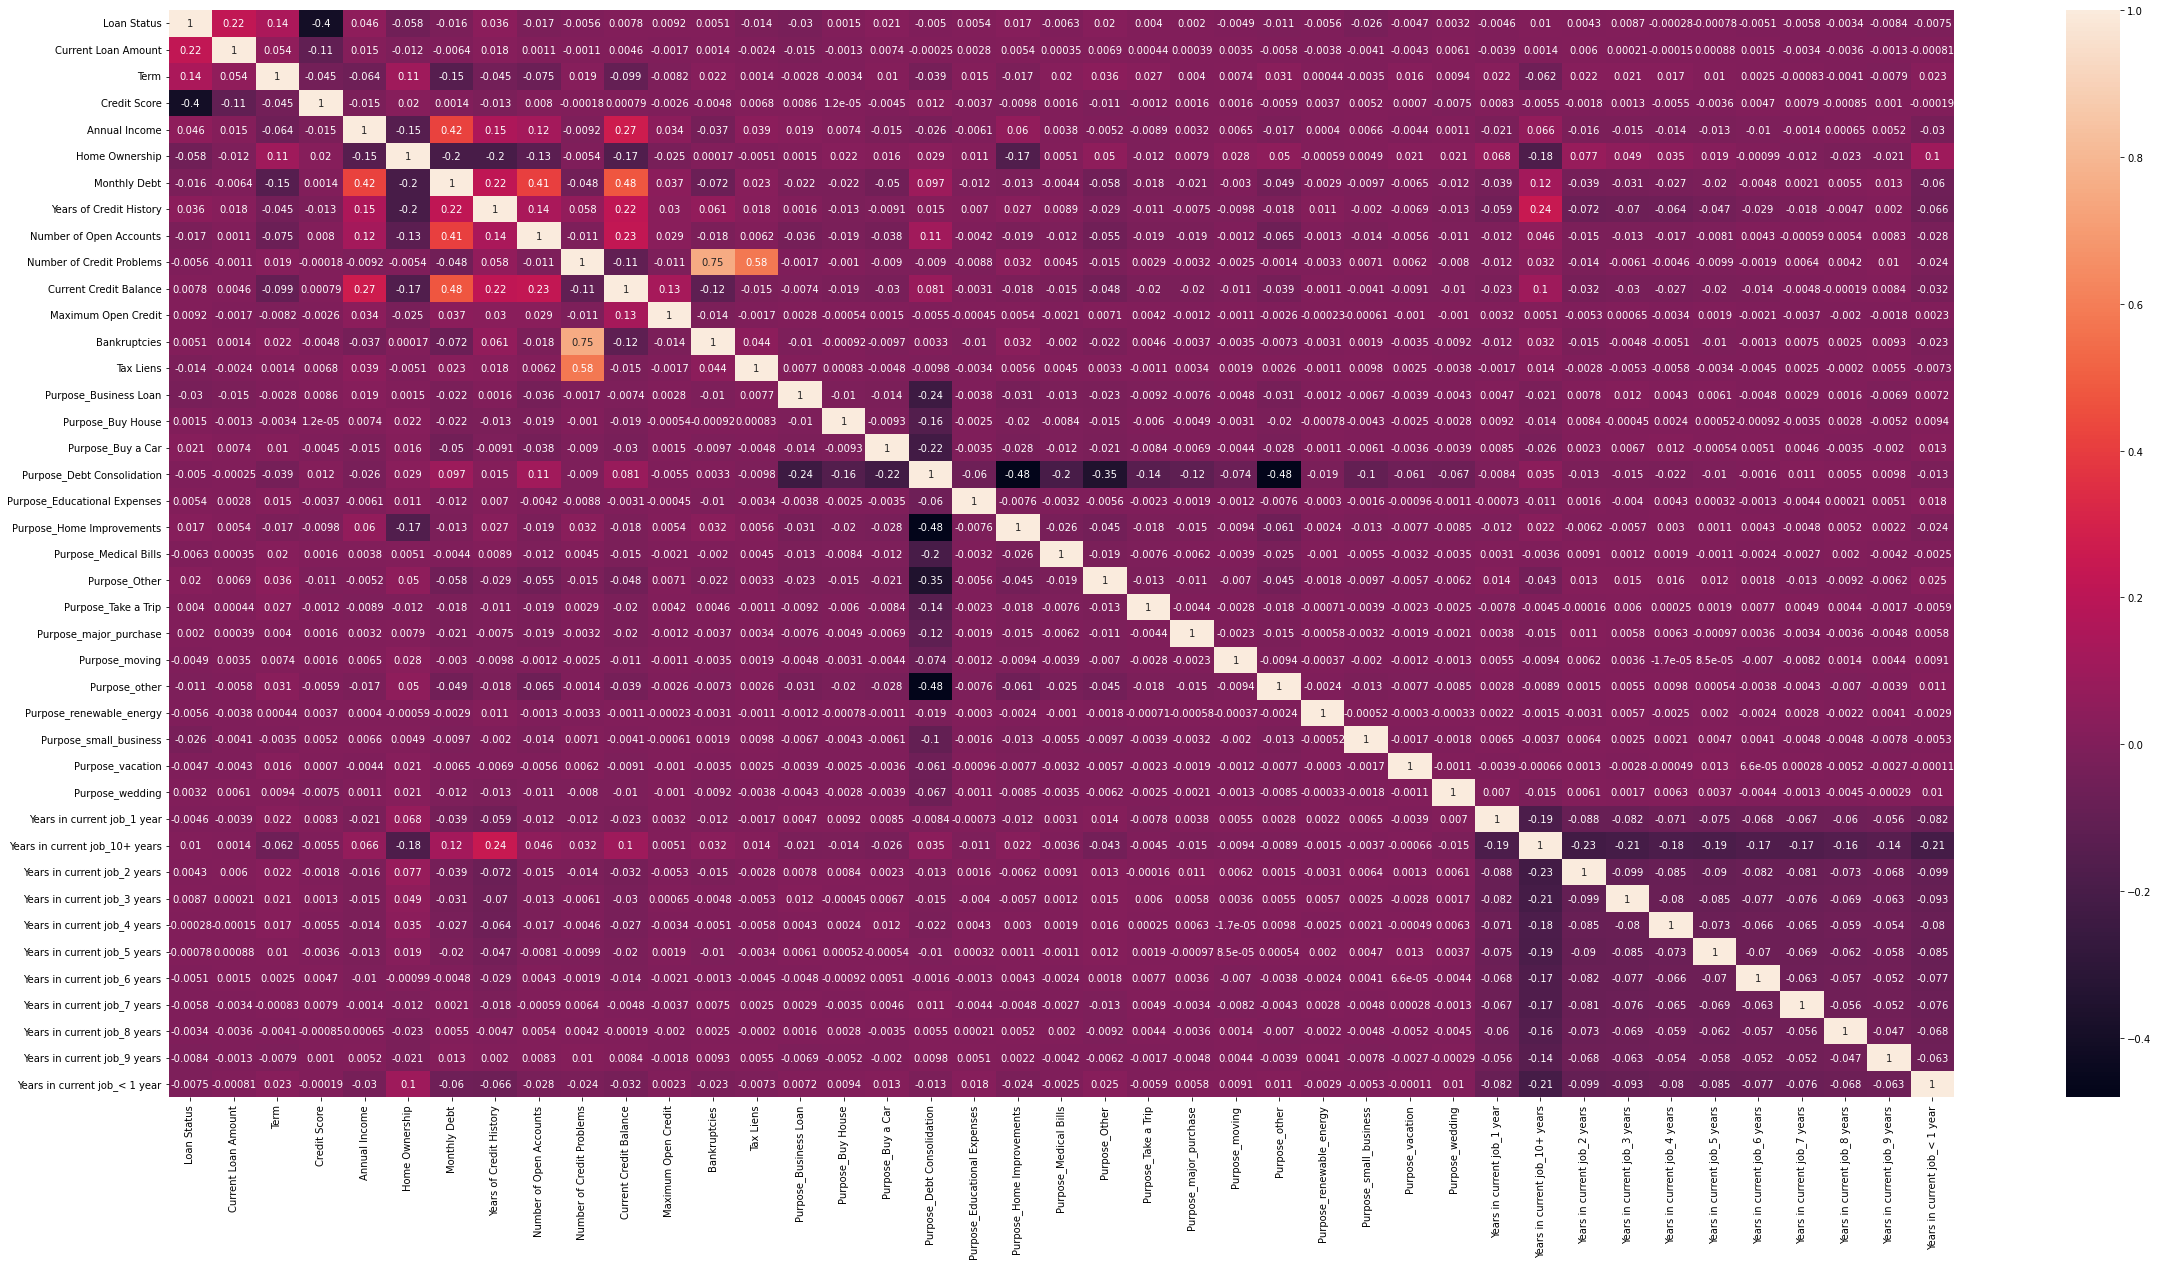

In [74]:
plt.figure(figsize=(40,20))
sns.heatmap(d_train.corr(),annot=True)

# spliting the data

In [75]:
#splitting the x and the y 
x=d_train.drop(["Loan Status"],axis=1)
y=d_train["Loan Status"]

In [76]:
#getting the shape of the splited data
print("the rows and the columns of x is", x.shape)
print("the rows and the  column of y is",y.shape)

the rows and the columns of x is (85791, 40)
the rows and the  column of y is (85791,)


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# building the model

In [78]:
models=LogisticRegression()

In [79]:
#fitting the model
models.fit(x_train,y_train)

LogisticRegression()

# model evaluation

In [80]:
#evaluating the performance of the model
pred=models.predict(x_test)

In [81]:
#getting the confusion_matrix
confusion_matrix(y_test,pred)

array([[  852,  3228],
       [   84, 12995]], dtype=int64)

In [82]:
#getting the classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.21      0.34      4080
           1       0.80      0.99      0.89     13079

    accuracy                           0.81     17159
   macro avg       0.86      0.60      0.61     17159
weighted avg       0.83      0.81      0.76     17159



In [84]:
#printing the accuracy of the model
print(accuracy_score(y_test,pred)*100)

80.69817588437554
